<a href="https://colab.research.google.com/github/MaureenGatu/Principal-Component-Analysis/blob/main/Multivariate_Techniques_Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multivariate Techniques: Principal Component Analysis.**


## Loading The Data

In [3]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the data

air = pd.read_excel('/content/drive/MyDrive/Moringa Interview Prep/DATA/AirQualityUCI.xlsx')

## Data Overview

#### **Data Description**

  DATA SOURCE : [UCI](https://archive.ics.uci.edu/ml/datasets/Air+quality)

*Attribute Information:*

0. Date (DD/MM/YYYY)

1. Time (HH.MM.SS)

2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7. True hourly averaged NOx concentration in ppb (reference analyzer)

8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12. Temperature in Â°C

13. Relative Humidity (%)

14. AH Absolute Humidity



### Overview

In [6]:
# Preview the data
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
#Viewing the column names
columns_names=air.columns.tolist()
print("Columns names:")

columns_names

Columns names:


['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [8]:
# Shape/Size of the data
air.shape

(9357, 15)

In [9]:
# Data types and Column Information
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

## Data Cleaning

In [10]:
# Checking for missing values
air.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

The dataset has no missing values

In [11]:
# Checking for Duplicates
air.duplicated().unique()

array([False])

There are no duplicated records.

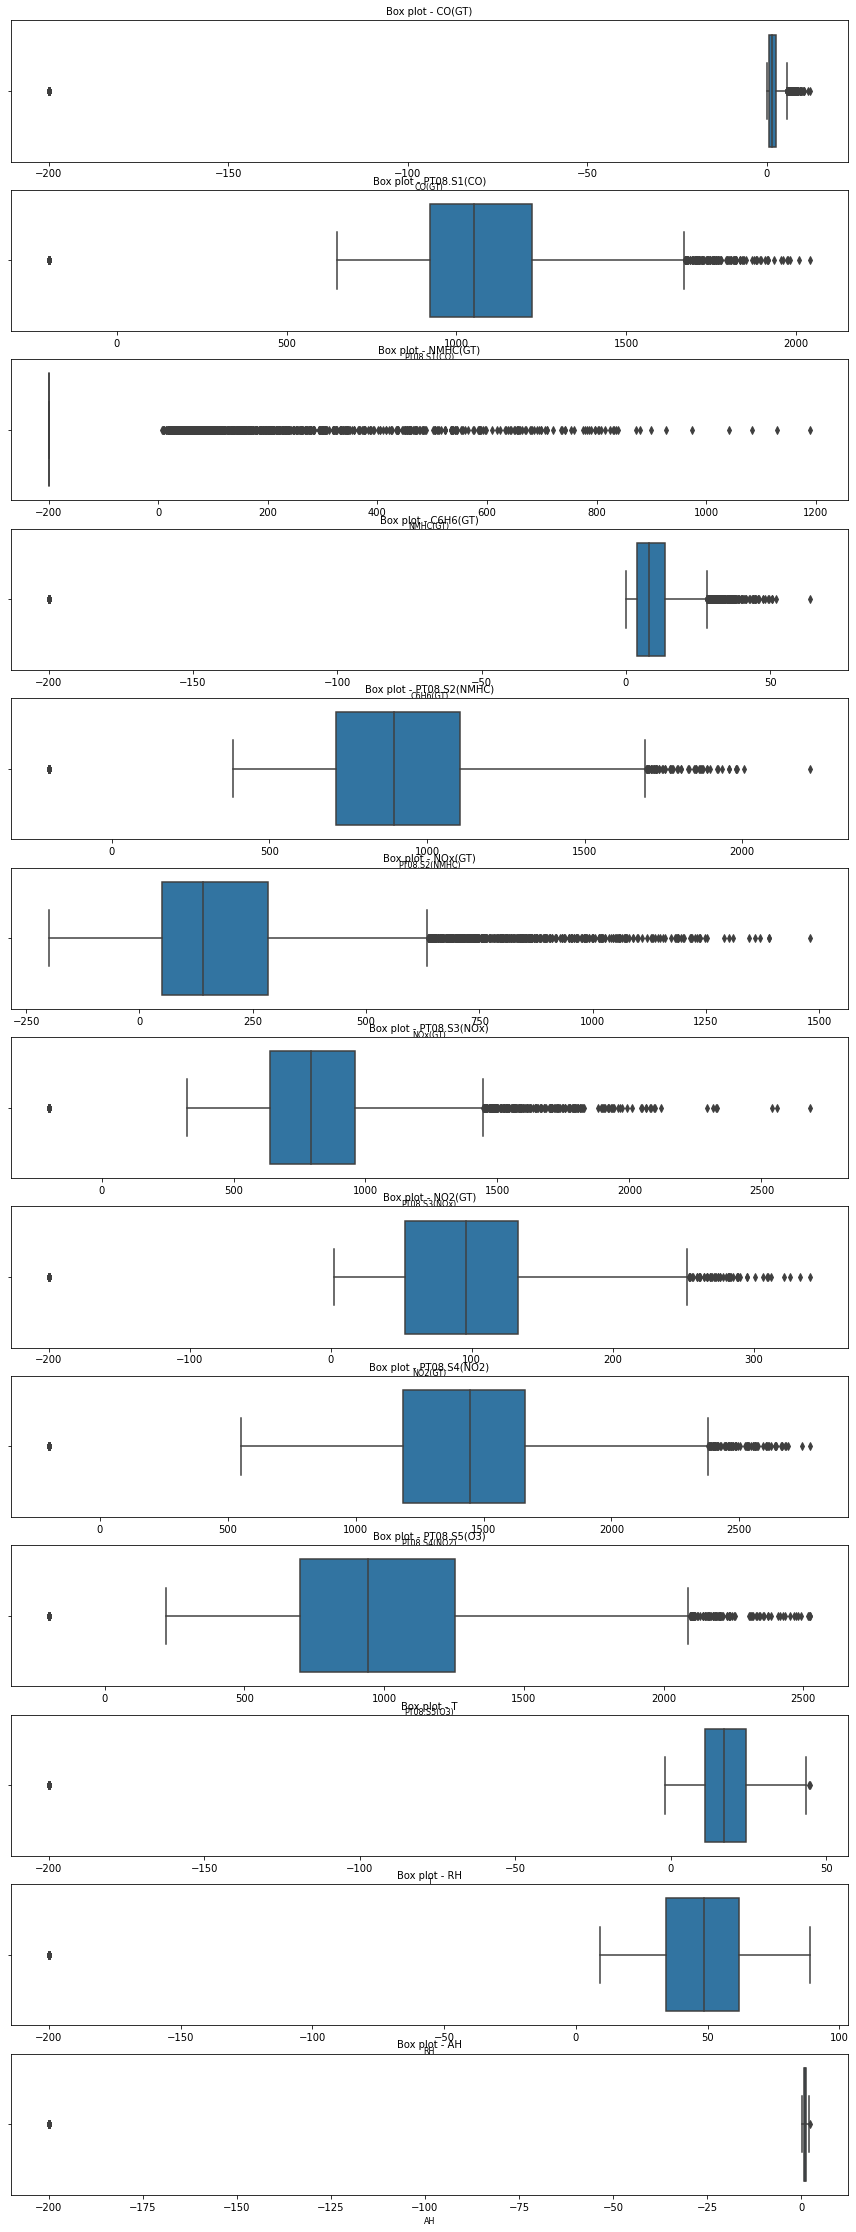

In [12]:
# Checking for outliers
#Outliers box plots
air_num = air.iloc[:, 2:]
cols = air_num.columns.tolist()
fig, ax = plt.subplots(len(cols), figsize=(15,40))

for i, col_val in enumerate(cols):
    sns.boxplot(air[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [13]:
# Check fot hte total outliers in the data
Q1 = air[cols].quantile(0.25)
Q3 = air[cols].quantile(0.75)
IQR = Q3 -Q1
outliers = air[cols][((air[cols] < (Q1 - 1.5 * IQR)) |(air[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('There are ', len(outliers) , 'outliers in the dataset')
# outliers are 6538 records.

There are  3894 outliers in the dataset


## Exploratory Data Analysis

### Univariate Analysis

In [14]:
# Descriptive statistics
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


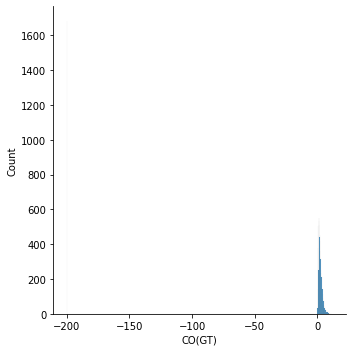

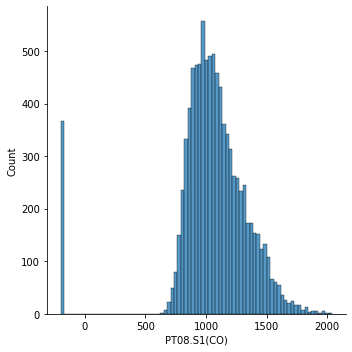

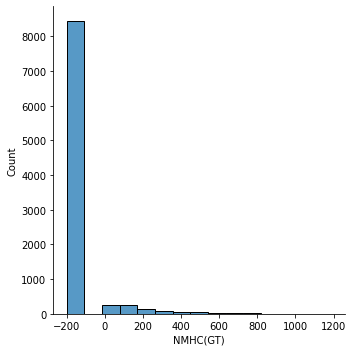

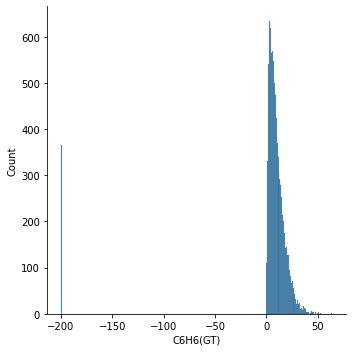

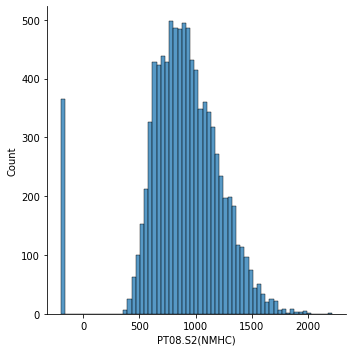

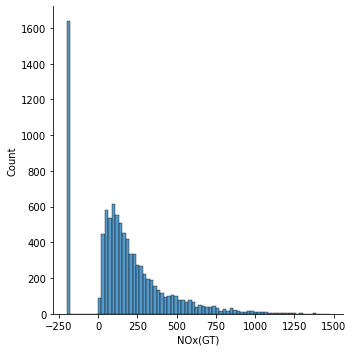

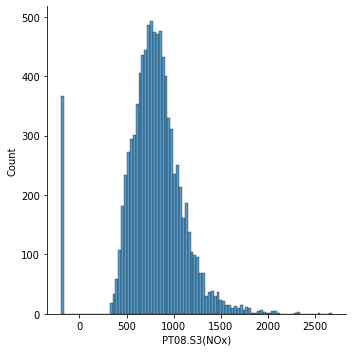

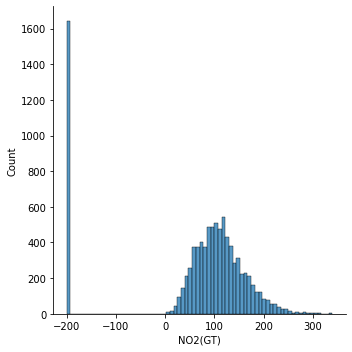

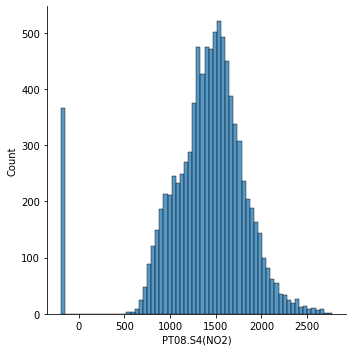

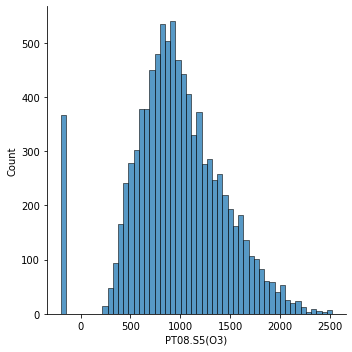

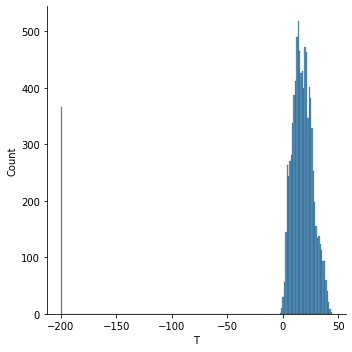

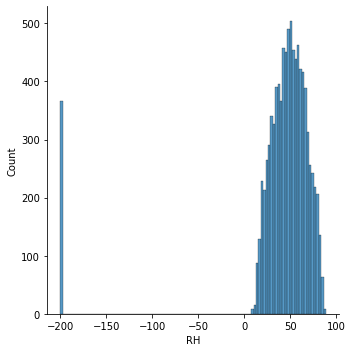

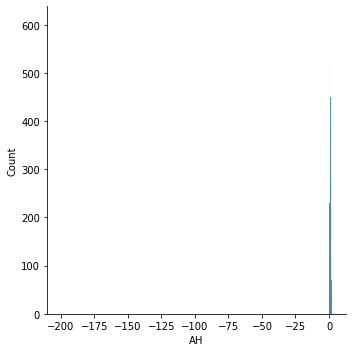

In [15]:
#Histograms to view the data distribution

for i in cols:
  sns.displot(air[i])

In [24]:
#measure of distribution
for i in cols:
  print('Column: ',i)
  print("The skewness is:", air[i].skew())
 
  s= air[i].skew()
  # if s > 1:
  if -0.5 > s < 0.5:
    print('\nThe distribution is fairly symmetrical')
  elif 0.5 > abs(s) < 1:
    print('\nThe distribution is moderately skewed')
  else:
    print('\nThe data are highly skewed')
  
  print("\nThe kurtosis is:", air[i].kurt())
  k = air[i].kurt()
  if k >3:
    print('\nThe distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('\nDistribution is light tailed')
  print("******"*10)

Column:  CO(GT)
The skewness is: -1.666179501747376

The distribution is fairly symmetrical

The kurtosis is: 0.7783055185279517

Distribution is light tailed
************************************************************
Column:  PT08.S1(CO)
The skewness is: -1.7211262553519766

The distribution is fairly symmetrical

The kurtosis is: 5.835511589282102

The distribution is heavy-tailed(leptokutic)
************************************************************
Column:  NMHC(GT)
The skewness is: 4.075784451950668

The data are highly skewed

The kurtosis is: 18.863823988489877

The distribution is heavy-tailed(leptokutic)
************************************************************
Column:  C6H6(GT)
The skewness is: -4.508774534629464

The distribution is fairly symmetrical

The kurtosis is: 19.188713943969375

The distribution is heavy-tailed(leptokutic)
************************************************************
Column:  PT08.S2(NMHC)
The skewness is: -0.7931529578939828

The distributio

### Bivariate Analysis

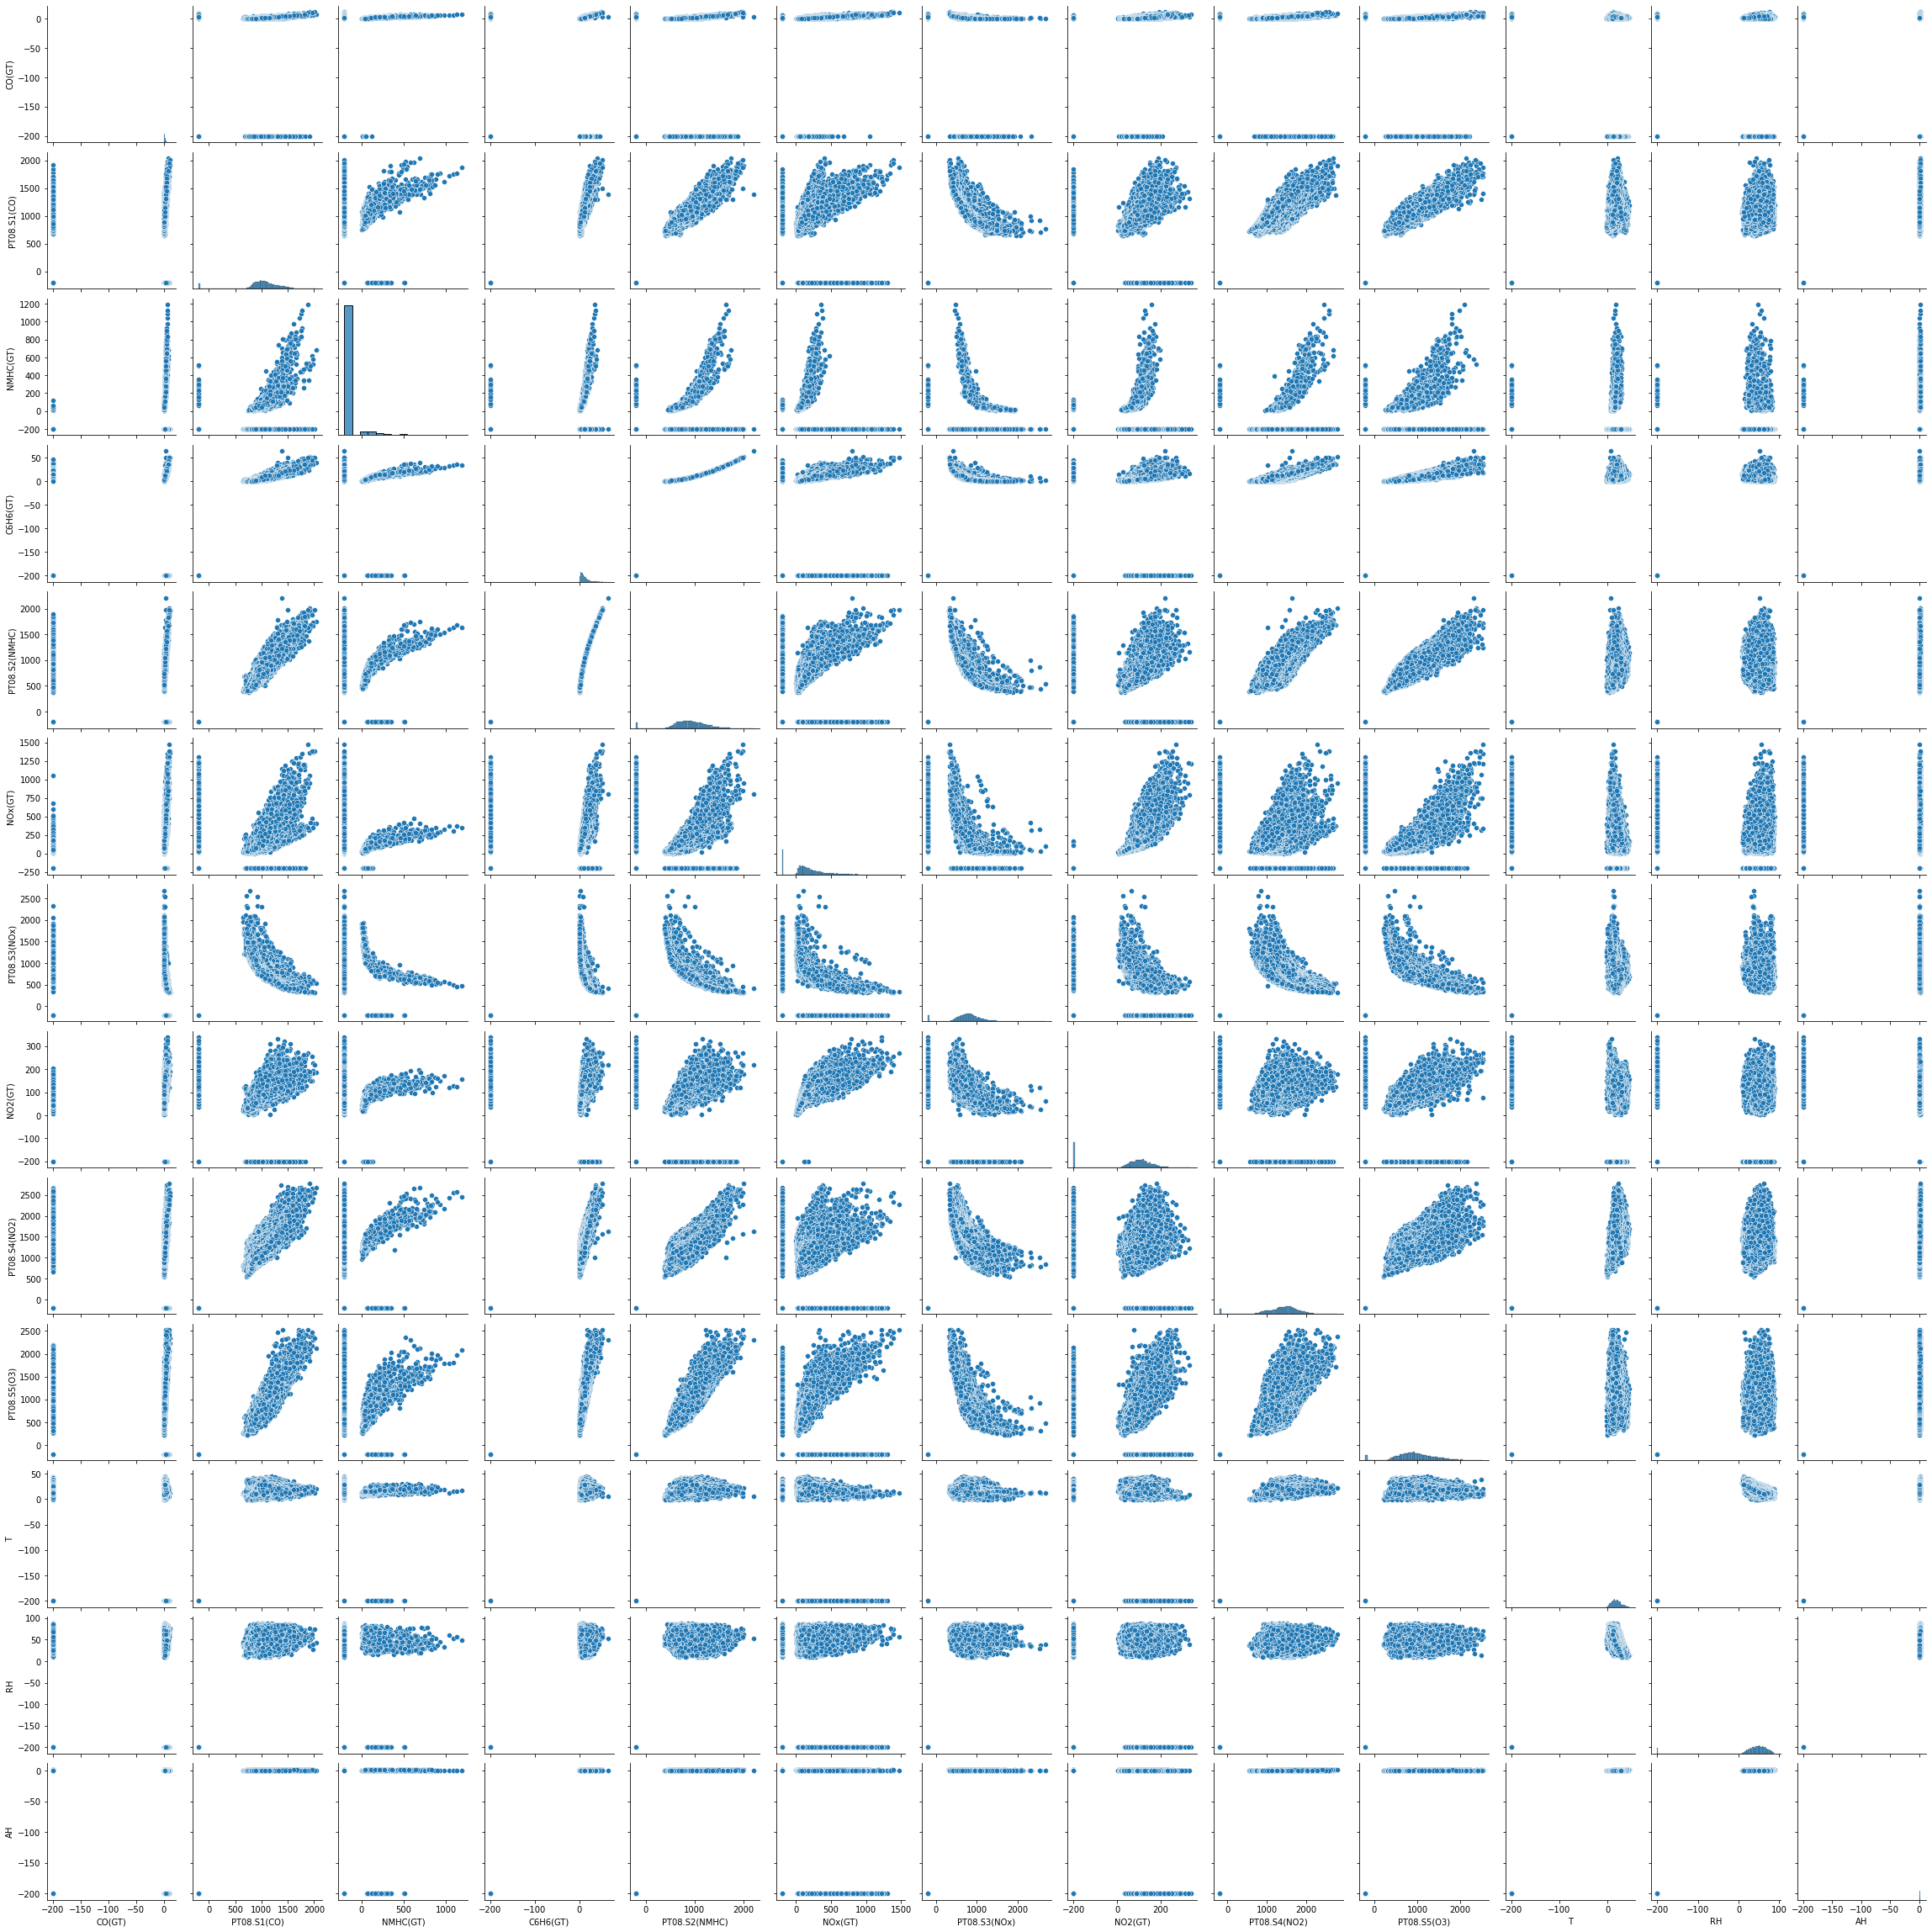

In [50]:
# Pair Plots
sns.pairplot(air[cols])

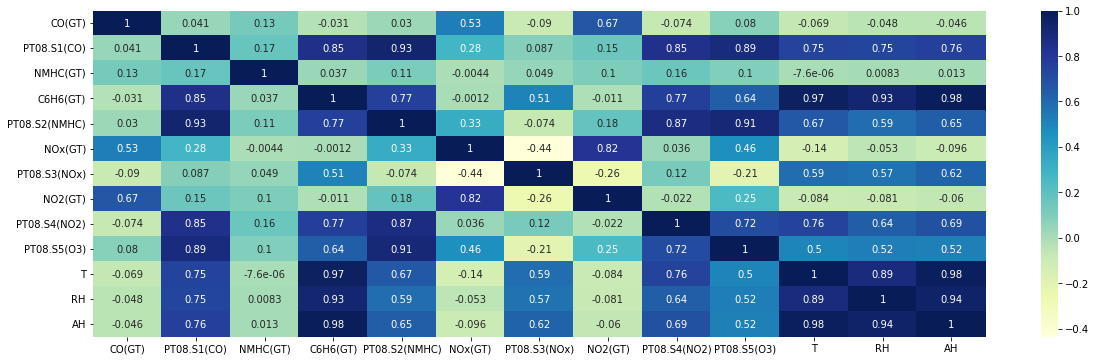

In [51]:
# HeatMap
corr=air[cols].corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

##  Principal Component Analysis 

* PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. 

* The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. 

* Principal components do not have any correlation with each other.

### Example 1
Manual computation

In [62]:
#Define the X and Y variables
# Taking Absolute Humidity(AH) as our dependent variable
X = air_num.iloc[:,:12].values
y = air_num.iloc[:,12].values

# Shape of X matrix
print('Shape of X matrix ',np.shape(X))
# Shape of X matrix
print('Shape of y matrix ',np.shape(y))

Shape of X matrix  (9357, 12)
Shape of y matrix  (9357,)


#### 1. Data Standardization
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data 

In [82]:
# We standardize the data using the standard scaler package from sklearn, preprocessing library.

# Import the library
from sklearn.preprocessing import StandardScaler

#Apply standardization to our x variables
sc = StandardScaler()
X_std = sc.fit_transform(X)

#### Covariance matrix

In [ ]:
# Use Numpy library to obtain the covariance matrix
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

In [ ]:
# Visualize the correlations in the covariance matrix using a heatmap
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

#### Eigen decomposition of the covariance matrix

In [ ]:
# Computing the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


##### Selecting Principal Components

* We choose the number of principal componts to use depending on the percentge of explained variance. We want to reduce the number of features without loosing a lot of information.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order: \n')
for i in eig_pairs:
    print(i[0])

# Percentage o explained variaance
print('\n\nPercentage o explained variaance: \n')
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

**Explained Variance**
* The first 4 principal components explian 91.56% of the variance in the data. We can hence reduce the our dimentions from 12 to 4 while retaining 91.56% of the information in the whole dataset.

### Example 2 
Using Scikit - Learn

In [88]:
# Performing PCA using Scikit-Learn is a two-step process:

# 1. Initialize the PCA class by passing the number of components to the constructor.
from sklearn.decomposition import PCA

pca = PCA()
# 2. Call the fit and then transform methods by passing the feature set to these methods
# The transform method returns the specified number of principal components.
x_pca = pca.fit_transform(X_std)

# Examine the eplianed variance from the principal components.
explained_variance = pca.explained_variance_ratio_

# View the expalined variance of each principal component
explained_variance

array([4.79136912e-01, 2.38776300e-01, 1.12202651e-01, 8.54691994e-02,
       3.26571920e-02, 2.08679996e-02, 1.04114210e-02, 8.68018712e-03,
       6.05202949e-03, 3.23324781e-03, 2.34246031e-03, 1.70400255e-04])

Text(0, 0.5, 'Cumulative explained variance')

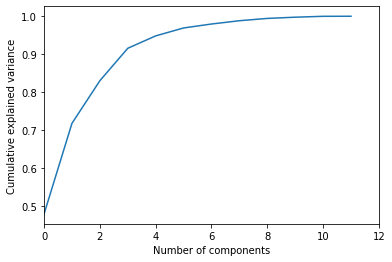

In [89]:
# We can visualize the cummulative explianed using the code below
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows that more than 90% variance by the first 4 components. Therfore we can drop the other components.

In [79]:
# Once we've choosen the number of principal component to use, we recast the orignal standardize data to the principal component axis.
# this is done by defining the n_components as shown below.
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=4)

x_sklearn = sklearn_pca.fit_transform(X_std)
# The transformed x (x_sklearn) can then be applied to a machine learning model.

### Example 3

Applying PCA to a machine leaning model.

In [98]:
# Using the X and Y we'd defined earlier
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
# Apply standardization to the x variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
# Perform PCA using scikit - Learn
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [101]:
# Compute the explained variance
explained_variance = pca.explained_variance_ratio_

explained_variance

array([4.79081065e-01, 2.40784895e-01, 1.10880872e-01, 8.54034924e-02,
       3.24020149e-02, 2.05463027e-02, 1.04345136e-02, 8.71974237e-03,
       6.00027697e-03, 3.22085456e-03, 2.35800954e-03, 1.67960940e-04])

In [109]:
# Train the model using 4 PCA`s which explian 91.56% of total variance.
pca = PCA(n_components=4)
X_train_com4 = pca.fit_transform(X_train)
X_test_com4 = pca.transform(X_test)

# Use random forest regressor for making the predictions.

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train_com4, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test_com4)

# Model evalution using R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999752430117491

### Exercise

In [ ]:
# Using the following data set perform Proncipal Component analysis
# Data URL = https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


In [ ]:
# Q1. What is the percentage of explined variance by each proncipal component?

In [ ]:
# Q2. Plot the cummulative variance curve to determine the number of principal component to use

In [ ]:
# Q3. Apply PCA to the indipendent variables and apply it to a machine learning model.

# **Recap**

***Summary***

* Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.

* PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

* The goal of PCA is to summarize the correlations among a set of observed variables with a smaller set of linear combinations.

*  Because it’s trying to capture the total variance in the set of variables, PCA requires that the input variables have similar scales of measurement.

*  Each component’s eigenvalue represents how much variance it explains.

* Since PCA depends only upon the feature set and not the label data, it can be considered as an unsupervised machine learning technique.